# Установка необходимых библиотек

In [27]:
%pip install pandas seaborn matplotlib ipywidgets

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\pupil\appdata\local\programs\python\python313\lib\site-packages (2.2.3)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Импорт библиотек

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import datetime
from datetime import datetime
import ipywidgets as widgets

sns.set_theme()

# Загружаем и предварительно обрабатываем данные из файла vgsales-12-4-2019-short.csv

Пропущенные данные заменяем на "неизвестно". Редкие категории в разделах Genre, Platform, Publisher, Developer группируем, объединив и переименовав из в "Прочее", для более приятного восприятия (если значение меньше 5).

Выводим все категории и пример первых заполненных строк данных.

In [29]:
data = pd.read_csv('vgsales-12-4-2019-short.csv')

data.fillna("неизвестно", inplace=True)

C:\Users\pupil\AppData\Local\Temp\ipykernel_16536\3425496420.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'неизвестно' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna("неизвестно", inplace=True)


Проверяем, что показывает база данных. 

In [30]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           55792 non-null  int64 
 1   Name           55792 non-null  object
 2   Genre          55792 non-null  object
 3   ESRB_Rating    55792 non-null  object
 4   Platform       55792 non-null  object
 5   Publisher      55792 non-null  object
 6   Developer      55792 non-null  object
 7   Critic_Score   55792 non-null  object
 8   User_Score     55792 non-null  object
 9   Total_Shipped  55792 non-null  object
 10  Global_Sales   55792 non-null  object
 11  NA_Sales       55792 non-null  object
 12  PAL_Sales      55792 non-null  object
 13  JP_Sales       55792 non-null  object
 14  Other_Sales    55792 non-null  object
 15  Year           55792 non-null  object
dtypes: int64(1), object(15)
memory usage: 6.8+ MB


,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,неизвестно,82.86,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2006.0
1,2,Super Mario Bros.,Platform,неизвестно,NES,Nintendo,Nintendo EAD,10.0,неизвестно,40.24,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,неизвестно,PC,PUBG Corporation,PUBG Corporation,неизвестно,неизвестно,36.6,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,2009.0


Проверка допустимости значений столбцов
-
Проверяет, что в указаном столбце col_name есть значение value, при ошибке возвращает False.

In [32]:
def check_existence_in_dataset(col_name: str, value) -> bool:
    unique_values = data[col_name].unique()
    return value in unique_values
check_existence_in_dataset('Year', 2010)


True

Вывод и визуализация глобальных продаж по году и основной платформе.
-
Принимает год **year**. Если год отсутствует в данных, выводит сообщение и возвращает пустые данные.
В противном случае выводит статистику продаж по платфомам и строит визуализацию. Возвращает отфильтрованные данные.

In [33]:
def get_sales_by_year(year: int) -> pd.DataFrame:
    if not check_existence_in_dataset('Year', year):
        print("Нет данных по запрошенному параметру, измените вводимые данные на корректные.")
        return pd.DataFrame()

    data_year = data[data['Year'] == year]
    data_year['Global_Sales'] = pd.to_numeric(data_year['Global_Sales'], errors='coerce')
    sales_by_platform = data_year.groupby('Platform')['Global_Sales'].sum().reset_index()
    sales_by_platform.sort_values('Global_Sales', ascending=False, inplace=True)
    print(f"Статистика продаж по платформам за {year} год:")
    display(sales_by_platform)
    return data_year
get_sales_by_year(2020)

Статистика продаж по платформам за 2020 год:


C:\Users\pupil\AppData\Local\Temp\ipykernel_16536\3677078361.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year['Global_Sales'] = pd.to_numeric(data_year['Global_Sales'], errors='coerce')


,Platform,Global_Sales
22,PSP,1.06
7,GBA,0.66
19,PS3,0.35
4,DS,0.35
16,PC,0.18
29,Wii,0.17
23,PSV,0.16
24,SAT,0.15
0,3DS,0.06
31,X360,0.03


,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
1006,1007,Plague Inc: Evolved,Strategy,неизвестно,PC,Ndemic Creations,Ndemic Creations,неизвестно,неизвестно,2.0,NaN,неизвестно,неизвестно,неизвестно,неизвестно,2020.0
2940,2941,Final Fantasy Type-0,Role-Playing,RP,PSP,Unknown,Square Enix,неизвестно,неизвестно,неизвестно,0.81,неизвестно,неизвестно,0.81,неизвестно,2020.0
2941,2942,Raft,Action,неизвестно,PC,Unknown,Redbeet Interactive,неизвестно,неизвестно,0.81,NaN,неизвестно,неизвестно,неизвестно,неизвестно,2020.0
3538,3539,Dragon Quest Monsters: Caravan Heart,Role-Playing,неизвестно,GBA,Unknown,TOSE,неизвестно,неизвестно,неизвестно,0.66,неизвестно,неизвестно,0.64,0.02,2020.0
6810,6811,Imagine: Makeup Artist,Simulation,E,DS,Ubisoft,Global A Entertainment,неизвестно,неизвестно,неизвестно,0.29,0.27,неизвестно,неизвестно,0.02,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53061,53062,Battle Chef Brigade,Action,неизвестно,PS4,Trinket Studios,Trinket Studios,неизвестно,неизвестно,неизвестно,NaN,неизвестно,неизвестно,неизвестно,неизвестно,2020.0
54006,54007,Journey To the Savage Planet,Adventure,неизвестно,PS4,505 Games,Typhoon Studios,неизвестно,неизвестно,неизвестно,NaN,неизвестно,неизвестно,неизвестно,неизвестно,2020.0
54007,54008,Journey To the Savage Planet,Adventure,неизвестно,XOne,505 Games,Typhoon Studios,неизвестно,неизвестно,неизвестно,NaN,неизвестно,неизвестно,неизвестно,неизвестно,2020.0
54008,54009,Journey To the Savage Planet,Adventure,неизвестно,PC,505 Games,Typhoon Studios,неизвестно,неизвестно,неизвестно,NaN,неизвестно,неизвестно,неизвестно,неизвестно,2020.0


Общие данные продаж игр в зависимости от жанра в круговой диаграмме.
-

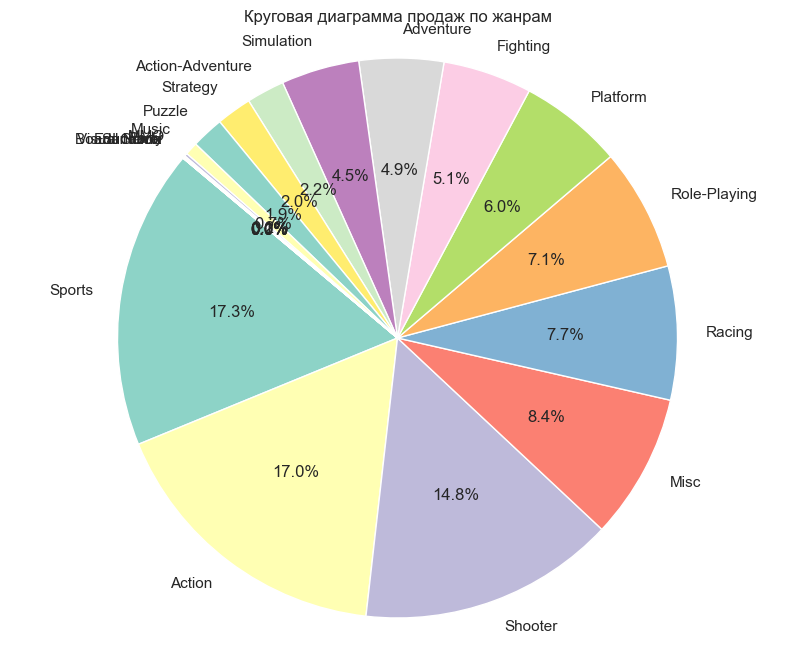

In [7]:

def convert_column_to_numeric(data, column_name):

    data[column_name] = pd.to_numeric(data[column_name], errors='coerce')

convert_column_to_numeric(data, 'Critic_Score')
convert_column_to_numeric(data, 'User_Score')
convert_column_to_numeric(data, 'Global_Sales')
convert_column_to_numeric(data, 'NA_Sales')
convert_column_to_numeric(data, 'PAL_Sales')
convert_column_to_numeric(data, 'JP_Sales')
convert_column_to_numeric(data, 'Other_Sales')
convert_column_to_numeric(data, 'Total_Shipped')
data['Year'] = pd.to_datetime(data['Year'], errors='coerce')

def plot_pie_chart_by_genre():
    sales_by_genre = data.groupby('Genre').agg({'Global_Sales': 'sum'}).reset_index()
    sales_by_genre = sales_by_genre.sort_values(by='Global_Sales', ascending=False)

    plt.figure(figsize=(10, 8))
    plt.pie(sales_by_genre['Global_Sales'], labels=sales_by_genre['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3", len(sales_by_genre)))
    plt.title('Круговая диаграмма продаж по жанрам')
    plt.axis('equal')  
    plt.show()

plot_pie_chart_by_genre()


Функция, которая строит точечную диаграмму.
-
Диаграмма строится, используя только те данные, где указаны все значения. В противном случае игра не указывается.
В диаграмме указываются следующие значения:
- x = оценка критиков
- y = оценка потребителей
- цвет *(hue)* = жанр
- размер *(size)* = размер глобальных продаж

Возвращает отсортированные данные.

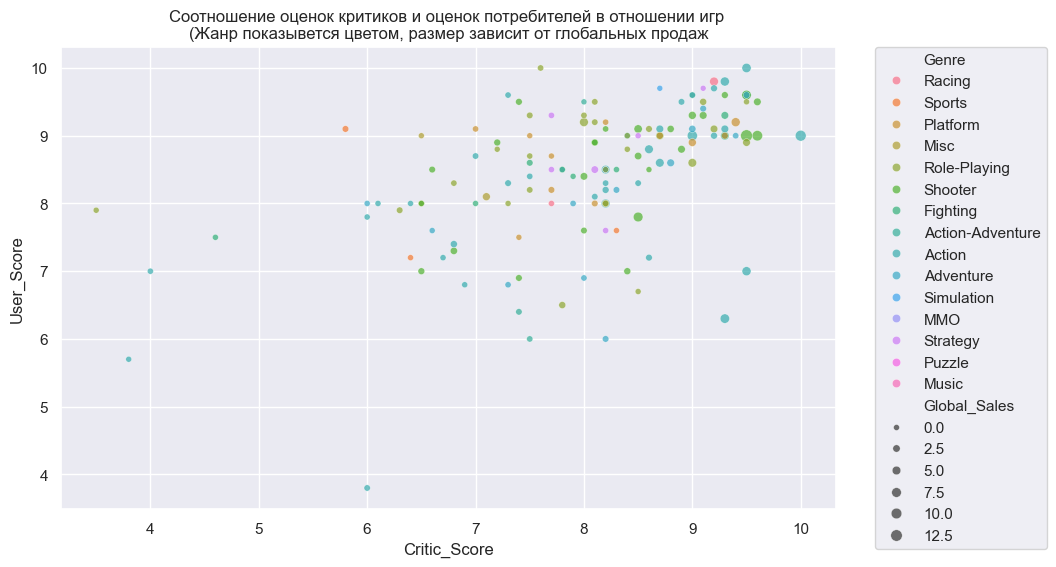

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002008
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002009
6,7,New Super Mario Bros.,Platform,E,DS,Nintendo,Nintendo EAD,9.1,8.1,30.80,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002006
8,9,New Super Mario Bros. Wii,Platform,E,Wii,Nintendo,Nintendo EAD,8.6,9.2,30.22,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002009
11,12,Wii Play,Misc,E,Wii,Nintendo,Nintendo EAD,5.9,4.5,28.02,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43104,43105,Robotron: 2084,Shooter,E,XBL,Midway Games,Digital Eclipse,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002005
48498,48499,The Legend of Zelda Collector's Edition,Adventure,E,GC,Nintendo,Nintendo Software Technology Corporation,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002003
51097,51098,Water Warfare,Shooter,E10,WW,Hudson Entertainment,Hudson Entertainment,7.2,7.9,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002009
54537,54538,Perception,Adventure,неизвестно,NS,Feardemic,The Deep End Games,6.0,7.9,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002017


In [8]:
def scatter_plot_genre_color():
    data_scatter = data.copy()
    data_scatter = data_scatter[data_scatter['Critic_Score'] != "неизвестно"]
    data_scatter = data_scatter[data_scatter['User_Score'] != "неизвестно"]
    data_scatter['Critic_Score'] = pd.to_numeric(data_scatter['Critic_Score'], errors='coerce')
    data_scatter['User_Score'] = pd.to_numeric(data_scatter['User_Score'], errors='coerce')
    data_scatter = data_scatter.dropna(subset=['Critic_Score', 'User_Score'])

    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(
        data=data_scatter,
        x='Critic_Score',
        y='User_Score',
        hue='Genre',
        size='Global_Sales',
        alpha=0.7,
        palette='husl'
    )
    scatter.set_title("Соотношение оценок критиков и оценок потребителей в отношении игр \n(Жанр показывется цветом, размер зависит от глобальных продаж")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()
    return data_scatter
scatter_plot_genre_color()

Строительство точечной диаграммы.
-
Диаграмма строится, используя только те данные, где указаны все значения. В противном случае игра не указывается.
В диаграмме указываются следующие значения:
- x = оценка критиков
- y = оценка потребителей
- цвет *(hue)* = платформа
- размер *(size)* = размер глобальных продаж

Возвращает отсортированные данные.

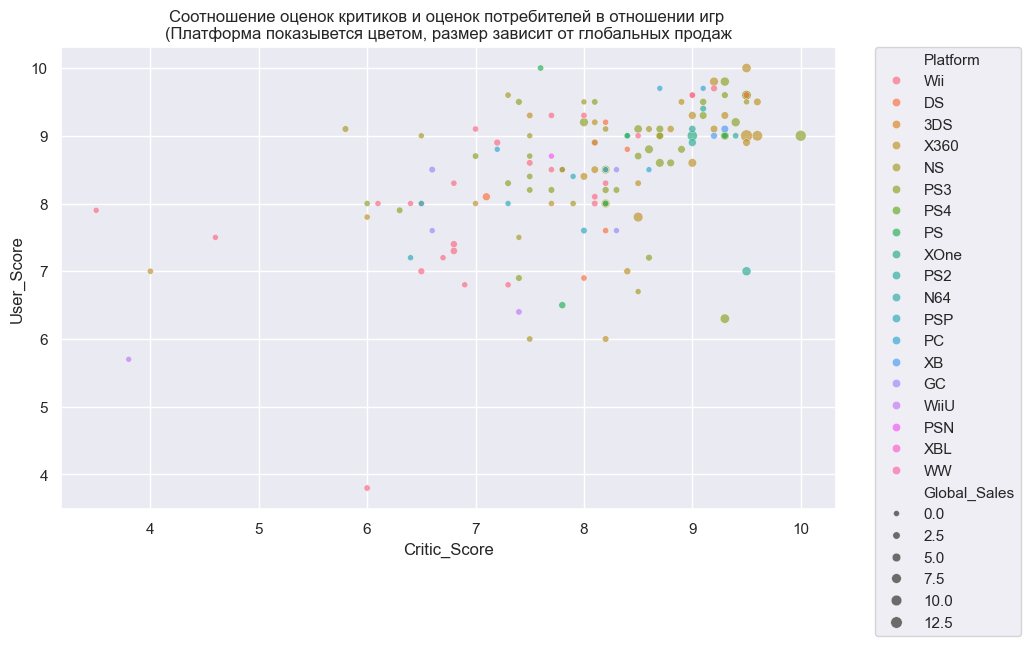

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002008
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002009
6,7,New Super Mario Bros.,Platform,E,DS,Nintendo,Nintendo EAD,9.1,8.1,30.80,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002006
8,9,New Super Mario Bros. Wii,Platform,E,Wii,Nintendo,Nintendo EAD,8.6,9.2,30.22,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002009
11,12,Wii Play,Misc,E,Wii,Nintendo,Nintendo EAD,5.9,4.5,28.02,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43104,43105,Robotron: 2084,Shooter,E,XBL,Midway Games,Digital Eclipse,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002005
48498,48499,The Legend of Zelda Collector's Edition,Adventure,E,GC,Nintendo,Nintendo Software Technology Corporation,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002003
51097,51098,Water Warfare,Shooter,E10,WW,Hudson Entertainment,Hudson Entertainment,7.2,7.9,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002009
54537,54538,Perception,Adventure,неизвестно,NS,Feardemic,The Deep End Games,6.0,7.9,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002017


In [9]:
def scatter_plot_platform_color():
    data_scatter = data.copy()
    data_scatter = data_scatter[data_scatter['Critic_Score'] != "неизвестно"]
    data_scatter = data_scatter[data_scatter['User_Score'] != "неизвестно"]
    data_scatter['Critic_Score'] = pd.to_numeric(data_scatter['Critic_Score'], errors='coerce')
    data_scatter['User_Score'] = pd.to_numeric(data_scatter['User_Score'], errors='coerce')
    data_scatter = data_scatter.dropna(subset=['Critic_Score', 'User_Score'])

    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(
        data=data_scatter,
        x='Critic_Score',
        y='User_Score',
        hue='Platform',
        size='Global_Sales',
        alpha=0.7,
        palette='husl'
    )
    scatter.set_title("Соотношение оценок критиков и оценок потребителей в отношении игр \n(Платформа показывется цветом, размер зависит от глобальных продаж")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

    return data_scatter
scatter_plot_platform_color()

Функция для составления сводной таблицы.
-
Создается сводная таблица по следующим парамерам:
- rows, cols - кортежи колонок, которые будут использоваться в качестве строк и столбцов.
- values - поле для агрегации (по умолчанию Global_Sales).
- aggfunc - функция агрегации (по умолчанию sum).

In [10]:
def create_pivot_table(rows=('Year', 'Genre'),
                       cols=('Platform',),
                       values='Global_Sales',
                       aggfunc='sum') -> pd.DataFrame:

    data[values] = pd.to_numeric(data[values], errors='coerce')

    pivot_data = pd.pivot_table(
        data,
        index=list(rows),
        columns=list(cols),
        values=values,
        aggfunc=aggfunc,
        fill_value=0
    )

    print(f"Сводная таблица по параметрам: rows={rows}, cols={cols}, values={values}, aggfunc={aggfunc}")
    display(pivot_data)

    return pivot_data
create_pivot_table()

Сводная таблица по параметрам: rows=('Year', 'Genre'), cols=('Platform',), values=Global_Sales, aggfunc=sum


Platform                                    2600  3DO  3DS  5200  7800  ACPC  \
Year                          Genre                                            
1970-01-01 00:00:00.000001970 Action        0.21  0.0  0.0   0.0   0.0   0.0   
                              Adventure     0.00  0.0  0.0   0.0   0.0   0.0   
                              Fighting      0.00  0.0  0.0   0.0   0.0   0.0   
                              Misc          0.00  0.0  0.0   0.0   0.0   0.0   
                              Platform      0.00  0.0  0.0   0.0   0.0   0.0   
...                                          ...  ...  ...   ...   ...   ...   
1970-01-01 00:00:00.000002020 Role-Playing  0.00  0.0  0.0   0.0   0.0   0.0   
                              Shooter       0.00  0.0  0.0   0.0   0.0   0.0   
                              Simulation    0.00  0.0  0.0   0.0   0.0   0.0   
                              Sports        0.00  0.0  0.0   0.0   0.0   0.0   
                              Strategy      0.00  0.0  0.0   0.0   0.0   0.0   

Platform                                     AJ  AST  Aco  Amig  ...  Wii  \
Year                          Genre                              ...        
1970-01-01 00:00:00.000001970 Action        0.0  0.0  0.0   0.0  ...  0.0   
                              Adventure     0.0  0.0  0.0   0.0  ...  0.0   
                              Fighting      0.0  0.0  0.0   0.0  ...  0.0   
                              Misc          0.0  0.0  0.0   0.0  ...  0.0   
                              Platform      0.0  0.0  0.0   0.0  ...  0.0   
...                                         ...  ...  ...   ...  ...  ...   
1970-01-01 00:00:00.000002020 Role-Playing  0.0  0.0  0.0   0.0  ...  0.0   
                              Shooter       0.0  0.0  0.0   0.0  ...  0.0   
                              Simulation    0.0  0.0  0.0   0.0  ...  0.0   
                              Sports        0.0  0.0  0.0   0.0  ...  0.0   
                              Strategy      0.0  0.0  0.0   0.0  ...  0.0   

Platform                                    WiiU  WinP  X360   XB  XBL  XOne  \
Year                          Genre                                            
1970-01-01 00:00:00.000001970 Action         0.0   0.0   0.0  0.0  0.0   0.0   
                              Adventure      0.0   0.0   0.0  0.0  0.0   0.0   
                              Fighting       0.0   0.0   0.0  0.0  0.0   0.0   
                              Misc           0.0   0.0   0.0  0.0  0.0   0.0   
                              Platform       0.0   0.0   0.0  0.0  0.0   0.0   
...                                          ...   ...   ...  ...  ...   ...   
1970-01-01 00:00:00.000002020 Role-Playing   0.0   0.0   0.0  0.0  0.0   0.0   
                              Shooter        0.0   0.0   0.0  0.0  0.0   0.0   
                              Simulation     0.0   0.0   0.0  0.0  0.0   0.0   
                              Sports         0.0   0.0   0.0  0.0  0.0   0.0   
                              Strategy       0.0   0.0   0.0  0.0  0.0   0.0   

Platform                                    ZXS  iOS  iQue  
Year                          Genre                         
1970-01-01 00:00:00.000001970 Action        0.0  0.0   0.0  
                              Adventure     0.0  0.0   0.0  
                              Fighting      0.0  0.0   0.0  
                              Misc          0.0  0.0   0.0  
                              Platform      0.0  0.0   0.0  
...                                         ...  ...   ...  
1970-01-01 00:00:00.000002020 Role-Playing  0.0  0.0   0.0  
                              Shooter       0.0  0.0   0.0  
                              Simulation    0.0  0.0   0.0  
                              Sports        0.0  0.0   0.0  
                              Strategy      0.0  0.0   0.0  

[628 rows x 74 columns]

Platform                                    2600  3DO  3DS  5200  7800  ACPC  \
Year                          Genre                                            
1970-01-01 00:00:00.000001970 Action        0.21  0.0  0.0   0.0   0.0   0.0   
                              Adventure     0.00  0.0  0.0   0.0   0.0   0.0   
                              Fighting      0.00  0.0  0.0   0.0   0.0   0.0   
                              Misc          0.00  0.0  0.0   0.0   0.0   0.0   
                              Platform      0.00  0.0  0.0   0.0   0.0   0.0   
...                                          ...  ...  ...   ...   ...   ...   
1970-01-01 00:00:00.000002020 Role-Playing  0.00  0.0  0.0   0.0   0.0   0.0   
                              Shooter       0.00  0.0  0.0   0.0   0.0   0.0   
                              Simulation    0.00  0.0  0.0   0.0   0.0   0.0   
                              Sports        0.00  0.0  0.0   0.0   0.0   0.0   
                              Strategy      0.00  0.0  0.0   0.0   0.0   0.0   

Platform                                     AJ  AST  Aco  Amig  ...  Wii  \
Year                          Genre                              ...        
1970-01-01 00:00:00.000001970 Action        0.0  0.0  0.0   0.0  ...  0.0   
                              Adventure     0.0  0.0  0.0   0.0  ...  0.0   
                              Fighting      0.0  0.0  0.0   0.0  ...  0.0   
                              Misc          0.0  0.0  0.0   0.0  ...  0.0   
                              Platform      0.0  0.0  0.0   0.0  ...  0.0   
...                                         ...  ...  ...   ...  ...  ...   
1970-01-01 00:00:00.000002020 Role-Playing  0.0  0.0  0.0   0.0  ...  0.0   
                              Shooter       0.0  0.0  0.0   0.0  ...  0.0   
                              Simulation    0.0  0.0  0.0   0.0  ...  0.0   
                              Sports        0.0  0.0  0.0   0.0  ...  0.0   
                              Strategy      0.0  0.0  0.0   0.0  ...  0.0   

Platform                                    WiiU  WinP  X360   XB  XBL  XOne  \
Year                          Genre                                            
1970-01-01 00:00:00.000001970 Action         0.0   0.0   0.0  0.0  0.0   0.0   
                              Adventure      0.0   0.0   0.0  0.0  0.0   0.0   
                              Fighting       0.0   0.0   0.0  0.0  0.0   0.0   
                              Misc           0.0   0.0   0.0  0.0  0.0   0.0   
                              Platform       0.0   0.0   0.0  0.0  0.0   0.0   
...                                          ...   ...   ...  ...  ...   ...   
1970-01-01 00:00:00.000002020 Role-Playing   0.0   0.0   0.0  0.0  0.0   0.0   
                              Shooter        0.0   0.0   0.0  0.0  0.0   0.0   
                              Simulation     0.0   0.0   0.0  0.0  0.0   0.0   
                              Sports         0.0   0.0   0.0  0.0  0.0   0.0   
                              Strategy       0.0   0.0   0.0  0.0  0.0   0.0   

Platform                                    ZXS  iOS  iQue  
Year                          Genre                         
1970-01-01 00:00:00.000001970 Action        0.0  0.0   0.0  
                              Adventure     0.0  0.0   0.0  
                              Fighting      0.0  0.0   0.0  
                              Misc          0.0  0.0   0.0  
                              Platform      0.0  0.0   0.0  
...                                         ...  ...   ...  
1970-01-01 00:00:00.000002020 Role-Playing  0.0  0.0   0.0  
                              Shooter       0.0  0.0   0.0  
                              Simulation    0.0  0.0   0.0  
                              Sports        0.0  0.0   0.0  
                              Strategy      0.0  0.0   0.0  

[628 rows x 74 columns]

# Вывод статистических меток.
Из уже отсортированных значений выводит среднее значение, медиану, максимум и минимум для глобальных продаж, оценок критикоа, оценок пользователей.


In [13]:
def print_statistics(filtered_data: pd.DataFrame):
    data_stats = filtered_data.copy()
    for col in ['Critic_Score', 'User_Score', 'Global_Sales']:
        data_stats[col] = pd.to_numeric(data_stats[col], errors='coerce')

    metrics = {}
    for col in ['Global_Sales', 'Critic_Score', 'User_Score']:
        valid_values = data_stats[col].dropna()
        if len(valid_values) == 0:
            metrics[col] = {
                'mean': None,
                'median': None,
                'max': None,
                'min': None
            }
        else:
            metrics[col] = {
                'mean': valid_values.mean(),
                'median': valid_values.median(),
                'max': valid_values.max(),
                'min': valid_values.min()
            }

    print("Статистические метрики (Глобальные продажи, оценка критиков, оценка пользователей): ")
    for col, vals in metrics.items():
        print(f"--- {col} ---")
        print(f"  Среднее:  {vals['mean']}")
        print(f"  Медиана:  {vals['median']}")
        print(f"  Максимум: {vals['max']}")
        print(f"  Минимум:  {vals['min']}")
print_statistics(data)

Статистические метрики (Глобальные продажи, оценка критиков, оценка пользователей): 
--- Global_Sales ---
  Среднее:  0.3655029616276075
  Медиана:  0.12
  Максимум: 20.32
  Минимум:  0.0
--- Critic_Score ---
  Среднее:  7.213708690330477
  Медиана:  7.5
  Максимум: 10.0
  Минимум:  1.0
--- User_Score ---
  Среднее:  8.253432835820895
  Медиана:  8.5
  Максимум: 10.0
  Минимум:  2.0


# ТЕПЛОВАЯ КАРТА (HEATMAP) КОРРЕЛЯЦИИ
Показывает по:
- оси х  оценку критиков, если неизвестна, равна нулю
- оси у оценку пользователей, если неизвестна, равна нулю
- цветовой температуре глобальные продажи, чем светлее - тем меньше, чем темнее, тем больше

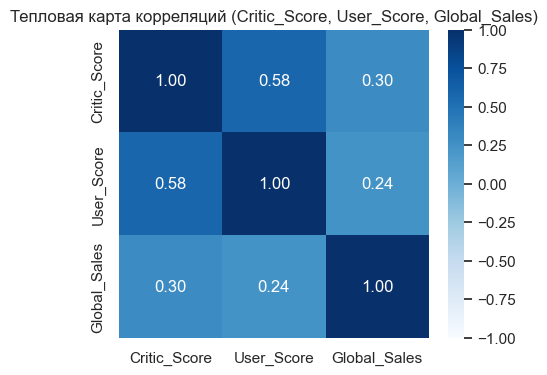

In [14]:
def plot_correlation_heatmap():
    corr_data = data[['Critic_Score', 'User_Score', 'Global_Sales']].copy()
    for col in corr_data.columns:
        corr_data[col] = pd.to_numeric(corr_data[col], errors='coerce')

    corr_matrix = corr_data.corr()

    plt.figure(figsize=(5, 4))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues', vmin=-1, vmax=1)
    plt.title("Тепловая карта корреляций (Critic_Score, User_Score, Global_Sales)")
    plt.show()
plot_correlation_heatmap()

# ИНТЕРАКТИВНЫЕ ВИДЖЕТЫ ДЛЯ ФИЛЬТРАЦИИ
Показ данных, отсортированных по году, жанру, платформе;
  -  Множественный фильтр по жанру, платформе, издателю и разработчику.

Dropdown(description='Жанр:', options=('Все', 'Action', 'Action-Adventure', 'Adventure', 'Board Game', 'Educat…

Dropdown(description='Платформа:', options=('Все', '2600', '3DO', '3DS', '5200', '7800', 'ACPC', 'AJ', 'AST', …

SelectMultiple(description='Издатели:', index=(0,), options=('Все', '100 Gates', '10TACLE Studios', '10tons', …

SelectMultiple(description='Разработчики:', index=(0,), options=('Все', '.theprodukkt', '07th Expansion', '0ve…

Количество строк в отфильтрованных данных: 74
Статистические метрики (Глобальные продажи, оценка критиков, оценка пользователей): 
--- Global_Sales ---
  Среднее:  0.370625
  Медиана:  0.15000000000000002
  Максимум: 2.05
  Минимум:  0.01
--- Critic_Score ---
  Среднее:  7.8100000000000005
  Медиана:  7.95
  Максимум: 9.3
  Минимум:  5.3
--- User_Score ---
  Среднее:  8.633333333333333
  Медиана:  8.6
  Максимум: 9.3
  Минимум:  8.0


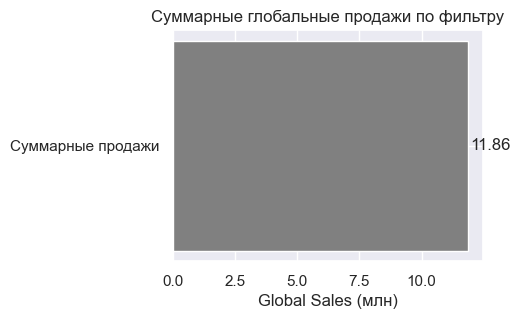

In [15]:
unique_genres = sorted(data['Genre'].unique())
unique_platforms = sorted(data['Platform'].unique())
unique_publishers = sorted(data['Publisher'].unique())
unique_devs = sorted(data['Developer'].unique())



genre_dropdown = widgets.Dropdown(
    options=['Все'] + unique_genres,
    description='Жанр:',
    value='Все'
)

platform_dropdown = widgets.Dropdown(
    options=['Все'] + unique_platforms,
    description='Платформа:',
    value='Все'
)

publisher_select = widgets.SelectMultiple(
    options=['Все'] + unique_publishers,
    description='Издатели:',
    value=['Все']
)

dev_select = widgets.SelectMultiple(
    options=['Все'] + unique_devs,
    description='Разработчики:',
    value=['Все']
)

def filter_data(genre, platform, publishers, devs) -> pd.DataFrame:
    filtered = data.copy()


    if genre != 'Все':
        if not check_existence_in_dataset('Genre', genre):
            print("Нет данных по запрошенному жанру, измените вводимые данные на корректные.")
            return pd.DataFrame()
        filtered = filtered[filtered['Genre'] == genre]

    if platform != 'Все':
        if not check_existence_in_dataset('Platform', platform):
            print("Нет данных по запрошенной платформе, измените вводимые данные на корректные.")
            return pd.DataFrame()
        filtered = filtered[filtered['Platform'] == platform]

    if publishers != ['Все']:
        for pub in publishers:
            if pub != 'Все' and not check_existence_in_dataset('Publisher', pub):
                print("Нет данных по запрошенному(ым) издателю(ям), измените вводимые данные на корректные.")
                return pd.DataFrame()
        valid_pubs = [p for p in publishers if p != 'Все']
        if valid_pubs:
            filtered = filtered[filtered['Publisher'].isin(valid_pubs)]

    if devs != ['Все']:
        for d in devs:
            if d != 'Все' and not check_existence_in_dataset('Developer', d):
                print("Нет данных по запрошенному(ым) разработчику(ам), измените вводимые данные на корректные.")
                return pd.DataFrame()
        valid_devs = [d for d in devs if d != 'Все']
        if valid_devs:
            filtered = filtered[filtered['Developer'].isin(valid_devs)]

    return filtered

def plot_global_sales_bar(filtered_data: pd.DataFrame):
    temp_data = filtered_data.copy()
    temp_data['Global_Sales'] = pd.to_numeric(temp_data['Global_Sales'], errors='coerce').fillna(0)

    total_sales = temp_data['Global_Sales'].sum()

    fig, ax = plt.subplots(figsize=(4, 3))
    ax.barh(['Суммарные продажи'], [total_sales], color='gray')
    ax.set_title("Суммарные глобальные продажи по фильтру")
    ax.set_xlabel("Global Sales (млн)")
    for i, v in enumerate([total_sales]):
        ax.text(v + 0.1, i, f"{v:.2f}", va='center')
    plt.show()

def on_change_filter(*args):
    genre_val = genre_dropdown.value
    platform_val = platform_dropdown.value
    publisher_val = list(publisher_select.value)
    dev_val = list(dev_select.value)

    filtered_data = filter_data(genre_val, platform_val, publisher_val, dev_val)

    if filtered_data.empty:
        print("Отфильтрованные данные пусты. Проверьте корректность введённых фильтров.")
    else:
        print(f"Количество строк в отфильтрованных данных: {len(filtered_data)}")
        print_statistics(filtered_data)
        plot_global_sales_bar(filtered_data)

genre_dropdown.observe(on_change_filter, 'value')
platform_dropdown.observe(on_change_filter, 'value')
publisher_select.observe(on_change_filter, 'value')
dev_select.observe(on_change_filter, 'value')

display(genre_dropdown, platform_dropdown, publisher_select, dev_select)

# Вывод топ игр, расчитанного по количеству отправленных копий, которые отсортированны по жанру.
Пользователь задает сколько игр будет в таблице, после выбирает по какому жанру он бы хотел увидеть статистику. Таблица регулируется в размере в зависимости от количества игр в топе. После этого пользователь выбирает из списка жанров тот, который ему интересен.

Доступные жанры:
1. Sports
2. Platform
3. Racing
4. Shooter
5. Role-Playing
6. Puzzle
7. Misc
8. Party
9. Simulation
10. Action
11. Action-Adventure
12. Fighting
13. Strategy
14. Adventure
15. Music
16. MMO
17. Sandbox
18. Visual Novel
19. Board Game
20. Education


C:\Users\pupil\AppData\Local\Temp\ipykernel_16536\3175895616.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Total_Shipped'] = pd.to_numeric(filtered_data['Total_Shipped'], errors='coerce')


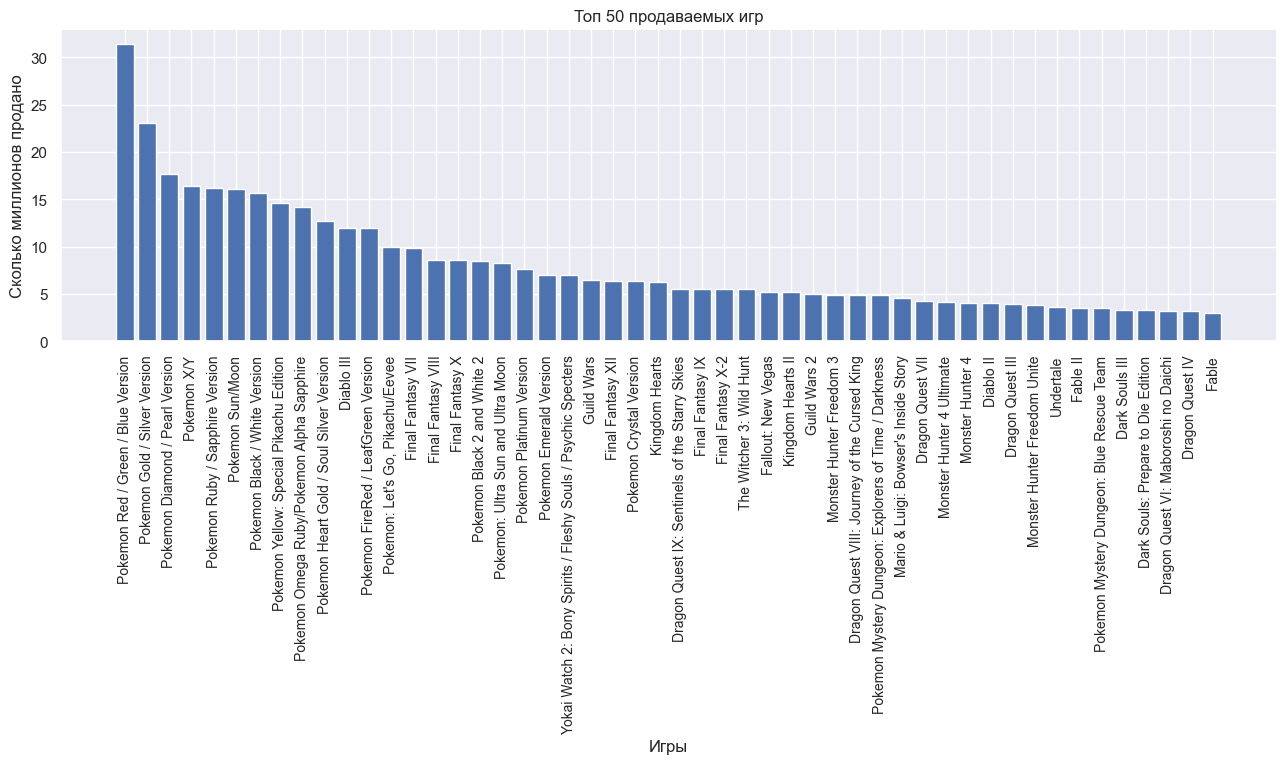

In [16]:
num_top = int(input("Введите, сколько вы хотите увидеть значений в топе: "))
if num_top <= 30:
  size_table = 1
elif num_top <= 60:
  size_table = 2
elif num_top <= 100:
  size_table = 3
else:
  size_table = 6

genres_table = data['Genre'].unique()
print("Доступные жанры:")
for i, genre in enumerate(genres_table):
    print(f"{i + 1}. {genre}")

genre_numb = int(input("Выберите номер жанра, по которому вы хотите получить статистику: ")) - 1
gen = genres_table[genre_numb]

filtered_data = data[data['Genre'] == gen]
filtered_data['Total_Shipped'] = pd.to_numeric(filtered_data['Total_Shipped'], errors='coerce')
top = filtered_data.sort_values(by='Total_Shipped', ascending=False).head(num_top)
total = top['Total_Shipped']
names = top['Name']
plt.bar(names, total)
plt.xlabel("Игры")
plt.ylabel("Сколько миллионов продано")
plt.title(f"Топ {num_top} продаваемых игр")
plt.xticks(rotation=90, fontsize=10)
plt.subplots_adjust(bottom=0.25, left=0.1, right=size_table, top=0.9)
plt.show()

Построение графика глобальных продаж за определенный год, отсортированного по жанрам.
-
Получение года выпуска игры от пользователя, который позволяет позже получить данные за тот год, который хочет пользователь, выборка данных по запрошенному году, показ глобальных продаж игр выпущенных за указанный год, отсортированные по основному жанру игры.

In [24]:
import datetime
from datetime import datetime
current_year = datetime.now().year

while True:
    try:
        year = int(input("Введите год для анализа (например, 2010): "))

        if 1970 <= year <= current_year:
            print(year)
            break
        else:
            print("Год не верен. Пожалйуста, введите год в актуальном диапазоне, начиная с 1970, до текущего включительно.")
    except ValueError:
        print("Пожалуйста, введите год в числовом формате.")


2012



Проданные игры, вышедшие в 2012 году (отсортированные по жанрам, по убыванию):
Genre
Shooter             69.10
Sports              50.36
Action              29.10
Action-Adventure    28.93
Role-Playing        27.99
Misc                21.61
Racing              15.11
Music               13.00
Fighting            12.01
Platform             8.37
Simulation           6.38
Adventure            5.86
Strategy             3.19
Puzzle               2.47
Party                1.30
Visual Novel         0.73
MMO                  0.00
Name: Global_Sales, dtype: float64


C:\Users\pupil\AppData\Local\Temp\ipykernel_16536\3052960397.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Global_Sales'] = pd.to_numeric(filtered_data['Global_Sales'], errors='coerce')
C:\Users\pupil\AppData\Local\Temp\ipykernel_16536\3052960397.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=sorted_data.index, y=sorted_data.values, ci=None)


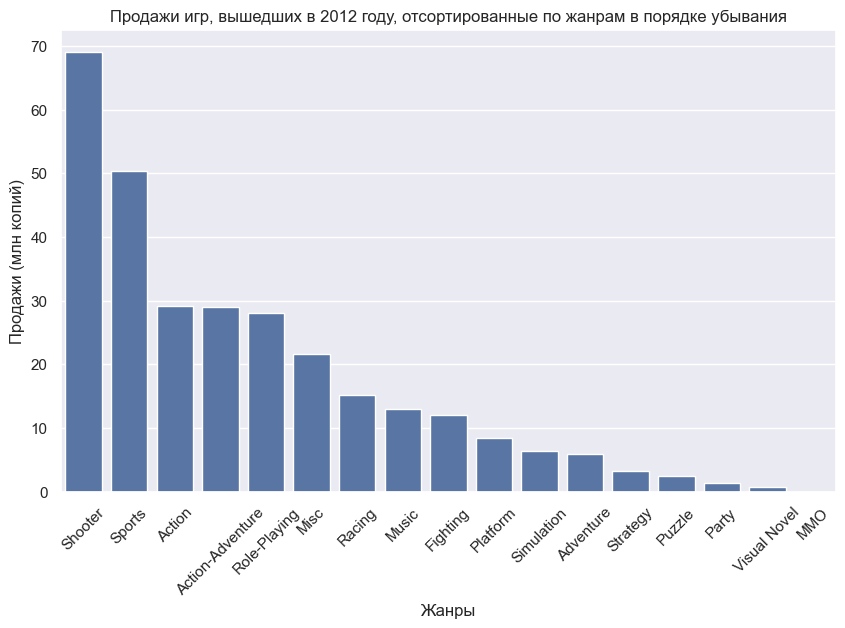

In [26]:
filtered_data = data[data["Year"] == year]

if filtered_data.empty:
    print(f"Нет данных за {year} год.")
else:
    filtered_data['Global_Sales'] = pd.to_numeric(filtered_data['Global_Sales'], errors='coerce')
    sorted_data = filtered_data.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)

    print(f"\nПроданные игры, вышедшие в {year} году (отсортированные по жанрам, по убыванию):")
    print(sorted_data)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_data.index, y=sorted_data.values, ci=None)
    plt.title(f"Продажи игр, вышедших в {year} году, отсортированные по жанрам в порядке убывания")
    plt.xlabel("Жанры")
    plt.ylabel("Продажи (млн копий)")
    plt.xticks(rotation=45)
    plt.show()


# Добавление в данных в базу данных

In [19]:
def check_empty_string(string):
  if not string:  
    return "неизвестно"
  else:
    return string
def new_row_create(Name, Genre, ESRB_Rating, Platform, Publisher, Developer, Critic_Score, User_Score, Total_Shipped, Global_Sales, NA_Sales, PAL_Sales, JP_Sales, Other_Sales, Year):
  global data
  new_row = {
      'Rank': len(data) + 1,
      'Name': Name,
      'Genre': Genre,
      'ESRB_Rating': ESRB_Rating,
      'Platform': Platform,
      'Publisher': Publisher,
      'Developer': Developer,
      'Critic_Score': Critic_Score,
      'User_Score': User_Score,
      'Total_Shipped': Total_Shipped,
      'Global_Sales': Global_Sales,
      'NA_Sales': NA_Sales,
      'PAL_Sales': PAL_Sales,
      'JP_Sales': JP_Sales,
      'Other_Sales': Other_Sales,
      'Year': Year
  }
  data = pd.concat([data, pd.DataFrame([new_row])], ignore_index=True)
while True:
  Name = input("Введите название игры: ")
  if not Name:
    print("У игры обязетельно должно быть название. Введите название еще раз.")
  else:
    break
genres_table = data['Genre'].unique()
while True:
  print("Доступные жанры:")
  for i, genre in enumerate(genres_table):
      print(f"{i + 1}. {genre}")
  Genre = input("Введите жанр игры: ")

  if Genre in genres_table:
      print(f"Выбранный жанр: {Genre}")
      break  # Выход из цикла, если жанр валидный
  else:
      print("Введённый жанр не найден в списке доступных. Пожалуйста, выберите из списка.")

ESRB_Rating = check_empty_string(input("Введите ESRB рейтинг игры: "))
Platform = check_empty_string(input("Введите платформу игры: "))
Publisher = check_empty_string(input("Введите издателя игры: "))
Developer = check_empty_string(input("Введите разработчика игры: "))
Critic_Score = check_empty_string(input("Введите оценку критиков: "))
User_Score = check_empty_string(input("Введите оценку пользователей: "))
Total_Shipped = check_empty_string(input("Введите количество копий, проданных: "))
Global_Sales = check_empty_string(input("Введите глобальные продажи: "))
NA_Sales = check_empty_string(input("Введите продажи в Северной Америке: "))
PAL_Sales = check_empty_string(input("Введите продажи в Европе, Африку, Южной Америке, Океании и Азии: "))
JP_Sales = check_empty_string(input("Введите продажи в Японии: "))
Other_Sales = check_empty_string(input("Введите другие продажи: "))
Year = check_empty_string(input("Введите год выпуска игры: "))

new_row_create(Name, Genre, ESRB_Rating, Platform, Publisher, Developer, Critic_Score, User_Score, Total_Shipped, Global_Sales, NA_Sales, PAL_Sales, JP_Sales, Other_Sales, Year)

data[data['Name'] == Name]

У игры обязетельно должно быть название. Введите название еще раз.
У игры обязетельно должно быть название. Введите название еще раз.
У игры обязетельно должно быть название. Введите название еще раз.
У игры обязетельно должно быть название. Введите название еще раз.
У игры обязетельно должно быть название. Введите название еще раз.
У игры обязетельно должно быть название. Введите название еще раз.
Доступные жанры:
1. Sports
2. Platform
3. Racing
4. Shooter
5. Role-Playing
6. Puzzle
7. Misc
8. Party
9. Simulation
10. Action
11. Action-Adventure
12. Fighting
13. Strategy
14. Adventure
15. Music
16. MMO
17. Sandbox
18. Visual Novel
19. Board Game
20. Education
Введённый жанр не найден в списке доступных. Пожалуйста, выберите из списка.
Доступные жанры:
1. Sports
2. Platform
3. Racing
4. Shooter
5. Role-Playing
6. Puzzle
7. Misc
8. Party
9. Simulation
10. Action
11. Action-Adventure
12. Fighting
13. Strategy
14. Adventure
15. Music
16. MMO
17. Sandbox
18. Visual Novel
19. Board Game
20. E

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
55792,55793,geh,Sports,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно,неизвестно
